# Initially, developed a Novice Real-Time Accident Detection System: Engineered a comprehensive model integrating hardware components (Arduino, GPS, GSM, Accelerometer) with C programming, resulting in a system capable of detecting and alerting for vehicular accidents.

Currently, I am working on a similar concept using Python with dummy data. This involves understanding additional parameters and implementing visualization to test and validate the model, aiming to expand its functionality.

# Real-time data

###### The synthetic data is generated to simulate real-time conditions, mirroring how these components would behave in a live environment. Consequently, this project focuses on real-time data processing and analysis.

# Data Collection

The dataset contains vehicle telemetry and sensor data for various analytical and testing purposes. The dataset consists of 1000 data points, each representing a minute-by-minute snapshot of vehicle conditions and operations.

Key Features:
* Timestamp: Captures the date and time of each data entry, starting from January 1, 2024.
* Speed: Measures vehicle speed in km/h, ranging from 0 to 120 km/h.
* Acceleration: Records the vehicle’s acceleration and deceleration in m/s², from -10 to 10 m/s².
* Braking: Indicates whether the brakes were applied (1) or not (0).
* GPS Coordinates: Provides latitude and longitude values for vehicle location, ranging from 20.0 to 30.0 for latitude and 80.0 to 90.0 for longitude.
* Accident Indicator: Shows if an accident occurred (1) or not (0), with a 5% occurrence rate.
* Impact Sensor: Measures impact intensity, with values between 0 and 10.
* Odometer Reading: Simulates cumulative distance traveled using a cumulative sum of random increments.
* Fuel Level: Represents fuel percentage, ranging from 10% to 100%.
* Engine Temperature: Records the engine temperature in °C, between 70 and 110 °C.
* Gyroscope Data: Provides readings along the x, y, and z axes, ranging from -5 to 5.
* Camera Images: Includes placeholder filenames for images captured by the vehicle’s camera.
* Microphone Noise Level: Measures ambient noise level in dB, between 30 and 100 dB.
* Tire Pressure: Represents tire pressure in psi, ranging from 30 to 35 psi.

This dataset is designed for developing and testing algorithms related to vehicle monitoring, accident detection, and overall automotive analytics. It provides a comprehensive view of vehicle performance and environmental conditions, enabling detailed analysis and model development.

In [90]:
import pandas as pd
import numpy as np

# Parameters
data_size = 1000  # Number of data points

# Generate dummy data
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=data_size, freq='T'),
    'speed': np.random.uniform(0, 120, size=data_size),
    'acceleration': np.random.uniform(-10, 10, size=data_size),
    'braking': np.random.choice([0, 1], size=data_size),
    'gps_latitude': np.random.uniform(20.0, 30.0, size=data_size),
    'gps_longitude': np.random.uniform(80.0, 90.0, size=data_size),
    'accident': np.random.choice([0, 1], size=data_size, p=[0.95, 0.05]),
    'impact_sensor': np.random.uniform(0, 10, size=data_size),  # Impact sensor data
    'odometer': np.cumsum(np.random.uniform(0, 2, size=data_size)),  # Cumulative distance
    'fuel_level': np.random.uniform(10, 100, size=data_size),  # Fuel level in percentage
    'engine_temp': np.random.uniform(70, 110, size=data_size),  # Engine temperature in °C
    'gyroscope_x': np.random.uniform(-5, 5, size=data_size),  # Gyroscope x-axis data
    'gyroscope_y': np.random.uniform(-5, 5, size=data_size),  # Gyroscope y-axis data
    'gyroscope_z': np.random.uniform(-5, 5, size=data_size),  # Gyroscope z-axis data
    'camera_image': [f'image_{i}.jpg' for i in range(data_size)],  # Placeholder image filenames
    'microphone_noise_level': np.random.uniform(30, 100, size=data_size),  # Noise level in dB
    'tire_pressure': np.random.uniform(30, 35, size=data_size)  # Tire pressure in psi
}

In [91]:
# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("extended_datalog.csv", index=False)

In [92]:
# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Vehicle data analysis
print("\nSpeed Summary:")
print(df['speed'].describe())

print("\nAcceleration Summary:")
print(df['acceleration'].describe())

print("\nBraking Events:")
print(df['braking'].value_counts())

print("\nAccident Events:")
print(df['accident'].value_counts())

print("\nFuel Level Summary:")
print(df['fuel_level'].describe())

print("\nEngine Temperature Summary:")
print(df['engine_temp'].describe())

print("\nGyroscope Data Summary:")
print(df[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']].describe())

print("\nTire Pressure Summary:")
print(df['tire_pressure'].describe())

# Camera Image Analysis (Placeholder)
print("\nCamera Image Filenames:")
print(df['camera_image'].head())

# Noise Level Analysis
print("\nMicrophone Noise Level Summary:")
print(df['microphone_noise_level'].describe())

# Timing Analysis (if timestamps are useful)
df['time_diff'] = df['timestamp'].diff().fillna(pd.Timedelta(seconds=0))
print("\nTime Differences Between Data Points:")
print(df[['timestamp', 'time_diff']].head())

# Impact Sensor Data Analysis
print("\nImpact Sensor Summary:")
print(df['impact_sensor'].describe())

# Odometer Data Analysis
print("\nOdometer Summary:")
print(df['odometer'].describe())

Summary Statistics:
                            timestamp        speed  acceleration      braking  \
count                            1000  1000.000000   1000.000000  1000.000000   
unique                            NaN          NaN           NaN          NaN   
top                               NaN          NaN           NaN          NaN   
freq                              NaN          NaN           NaN          NaN   
mean    2024-01-01 08:19:29.999999744    59.293286      0.131694     0.512000   
min               2024-01-01 00:00:00     0.131546     -9.923929     0.000000   
25%               2024-01-01 04:09:45    28.381540     -5.149794     0.000000   
50%               2024-01-01 08:19:30    60.432056      0.187415     1.000000   
75%               2024-01-01 12:29:15    87.223751      5.323891     1.000000   
max               2024-01-01 16:39:00   119.912021      9.941152     1.000000   
std                               NaN    34.254709      5.773432     0.500106   

       

# Implement Accident Detection

This processes a CSV file to detect accidents based on predefined thresholds for impact and acceleration. It flags records with significant impact or acceleration, or where an accident is already marked, and then filters and prints these accident events with details such as timestamp, speed, and GPS coordinates.

In [93]:
#Summary statistics
print(df[['impact_sensor', 'acceleration', 'braking']].describe())

       impact_sensor  acceleration      braking
count    1000.000000   1000.000000  1000.000000
mean        4.950994      0.131694     0.512000
std         2.878582      5.773432     0.500106
min         0.016414     -9.923929     0.000000
25%         2.540001     -5.149794     0.000000
50%         4.812013      0.187415     1.000000
75%         7.433976      5.323891     1.000000
max         9.996146      9.941152     1.000000


In [94]:
import pandas as pd
import numpy as np

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds for accident detection
impact_threshold = 7  # Example threshold for impact sensor
acceleration_threshold = 8  # Example threshold for acceleration

# Detect accidents
df['detected_accident'] = ((df['impact_sensor'] > impact_threshold) |
                            (df['acceleration'].abs() > acceleration_threshold) |
                            (df['accident'] == 1)).astype(int)

# Identify accident events
accidents = df[df['detected_accident'] == 1]

# Print detected accidents
print("\nDetected Accident Events:")
print(accidents[['timestamp', 'speed', 'acceleration', 'impact_sensor', 'gps_latitude', 'gps_longitude']])


Detected Accident Events:
               timestamp      speed  acceleration  impact_sensor  \
1    2024-01-01 00:01:00  16.145998     -9.724263       5.994734   
3    2024-01-01 00:03:00  15.007837      8.555539       2.062794   
5    2024-01-01 00:05:00  95.637954     -5.265993       8.109796   
7    2024-01-01 00:07:00  79.445259      5.040332       8.692240   
9    2024-01-01 00:09:00  56.635638     -8.379207       1.192361   
..                   ...        ...           ...            ...   
985  2024-01-01 16:25:00  22.374416      8.927011       2.667708   
991  2024-01-01 16:31:00  39.870462     -5.154918       8.611705   
992  2024-01-01 16:32:00  38.265688      9.679408       0.554506   
993  2024-01-01 16:33:00  34.684751      1.462254       7.635539   
996  2024-01-01 16:36:00  53.041863     -3.369660       0.773587   

     gps_latitude  gps_longitude  
1       27.397986      89.164564  
3       22.494968      84.433991  
5       29.671712      86.394764  
7       29.20410

# Visualization and Monitoring

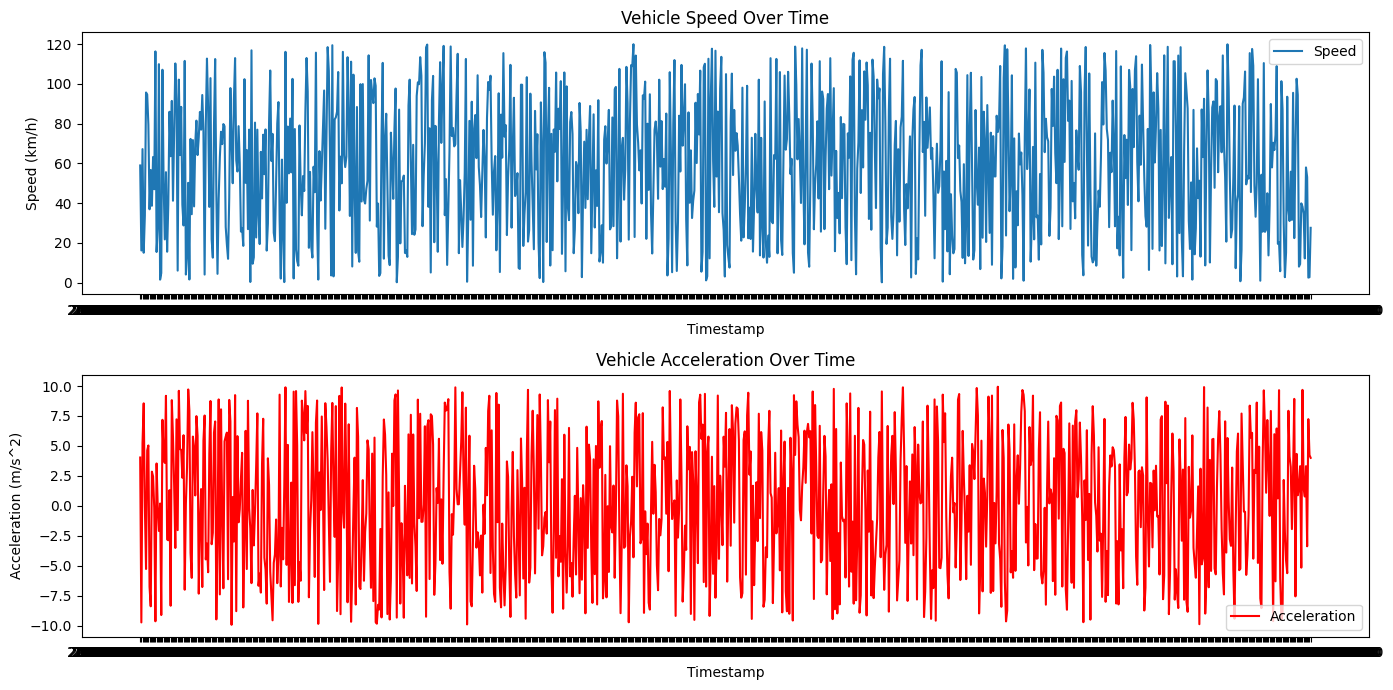

In [95]:
import matplotlib.pyplot as plt

# Plotting speed and acceleration data
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['speed'], label='Speed')
plt.title('Vehicle Speed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed (km/h)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['acceleration'], label='Acceleration', color='r')
plt.title('Vehicle Acceleration Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()

This code builds upon previous blocks by refining the detection thresholds and enhancing the alert generation process. It consolidates the logic for detecting accidents and generating alerts into a streamlined process, ensuring accurate and clear reporting of potential accidents.

In [96]:
import pandas as pd
import numpy as np

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define new thresholds for accident detection
impact_threshold = 7  # Adjusted threshold for impact sensor
acceleration_threshold = 5  # Adjusted threshold for acceleration
braking_threshold = 1  # Threshold for braking (binary values)

# Refined accident detection logic
df['detected_accident'] = (
    (df['impact_sensor'] > impact_threshold) |
    (df['acceleration'].abs() > acceleration_threshold) |
    (df['braking'] >= braking_threshold)
).astype(int)

# Generate alerts
def generate_alert(row):
    if row['detected_accident'] == 1:
        return f"Alert! Potential accident detected at {row['timestamp']}. Speed: {row['speed']}, Acceleration: {row['acceleration']}, Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})"
    return None

df['alert'] = df.apply(generate_alert, axis=1)

# Filter rows with alerts
alerts = df.dropna(subset=['alert'])

# Print detected accident alerts
print("\nAccident Alerts:")
print(alerts[['timestamp', 'speed', 'acceleration', 'impact_sensor', 'gps_latitude', 'gps_longitude', 'alert']])


Accident Alerts:
              timestamp      speed  acceleration  impact_sensor  gps_latitude  \
0   2024-01-01 00:00:00  58.921317      4.035889       3.674242     27.520834   
1   2024-01-01 00:01:00  16.145998     -9.724263       5.994734     27.397986   
2   2024-01-01 00:02:00  67.150204      5.225894       3.146262     22.969767   
3   2024-01-01 00:03:00  15.007837      8.555539       2.062794     22.494968   
5   2024-01-01 00:05:00  95.637954     -5.265993       8.109796     29.671712   
..                  ...        ...           ...            ...           ...   
992 2024-01-01 16:32:00  38.265688      9.679408       0.554506     26.366330   
993 2024-01-01 16:33:00  34.684751      1.462254       7.635539     27.121613   
995 2024-01-01 16:35:00  57.928793      3.314208       0.185426     25.375341   
997 2024-01-01 16:37:00   2.512847      7.236996       4.055055     25.768021   
999 2024-01-01 16:39:00  27.545412      4.008698       3.037930     25.741578   

     gps_

This code provides a visual summary of how often different values occur for the impact_sensor, acceleration, and braking variables in the dataset, helping to understand their distributions and patterns.

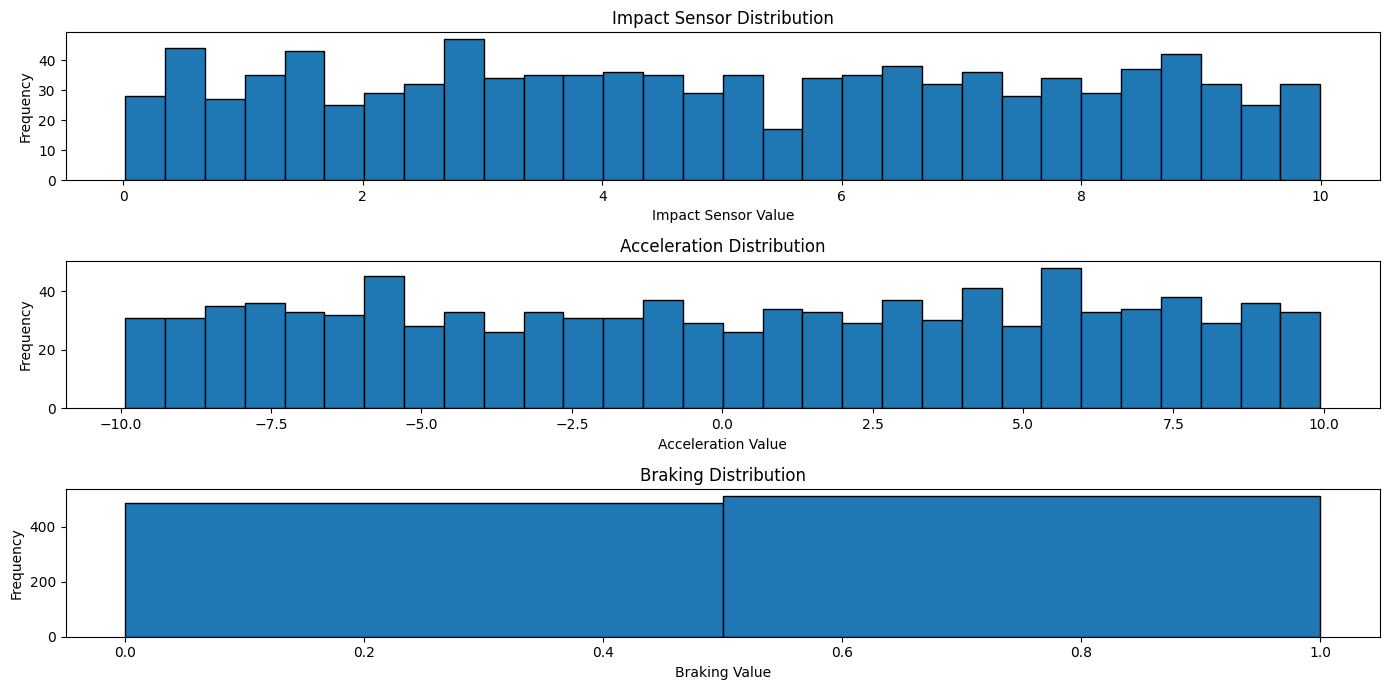

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.hist(df['impact_sensor'], bins=30, edgecolor='k')
plt.title('Impact Sensor Distribution')
plt.xlabel('Impact Sensor Value')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df['acceleration'], bins=30, edgecolor='k')
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration Value')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(df['braking'], bins=2, edgecolor='k')
plt.title('Braking Distribution')
plt.xlabel('Braking Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This snippet identifies and flags instances of high impact, high acceleration, and significant braking in the dataset, and then prints out these flagged instances to help analyze specific conditions where alerts were triggered.

In [98]:
# Test each condition separately
df['impact_alert'] = (df['impact_sensor'] > impact_threshold).astype(int)
df['acceleration_alert'] = (df['acceleration'].abs() > acceleration_threshold).astype(int)
df['braking_alert'] = (df['braking'] >= braking_threshold).astype(int)

# Check results
print("\nImpact Alerts:")
print(df[['timestamp', 'impact_sensor', 'impact_alert']].dropna(subset=['impact_alert']))

print("\nAcceleration Alerts:")
print(df[['timestamp', 'acceleration', 'acceleration_alert']].dropna(subset=['acceleration_alert']))

print("\nBraking Alerts:")
print(df[['timestamp', 'braking', 'braking_alert']].dropna(subset=['braking_alert']))



Impact Alerts:
              timestamp  impact_sensor  impact_alert
0   2024-01-01 00:00:00       3.674242             0
1   2024-01-01 00:01:00       5.994734             0
2   2024-01-01 00:02:00       3.146262             0
3   2024-01-01 00:03:00       2.062794             0
4   2024-01-01 00:04:00       1.291415             0
..                  ...            ...           ...
995 2024-01-01 16:35:00       0.185426             0
996 2024-01-01 16:36:00       0.773587             0
997 2024-01-01 16:37:00       4.055055             0
998 2024-01-01 16:38:00       4.610159             0
999 2024-01-01 16:39:00       3.037930             0

[1000 rows x 3 columns]

Acceleration Alerts:
              timestamp  acceleration  acceleration_alert
0   2024-01-01 00:00:00      4.035889                   0
1   2024-01-01 00:01:00     -9.724263                   1
2   2024-01-01 00:02:00      5.225894                   1
3   2024-01-01 00:03:00      8.555539                   1
4   2024-01

This script processes vehicle data to identify and print alerts when any of the predefined thresholds are exceeded, potentially indicating an accident or near-accident scenario.

In [99]:
import pandas as pd

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds for accident detection
impact_threshold = 7  # Example threshold for impact sensor
acceleration_threshold = 8  # Example threshold for acceleration
braking_threshold = 1  # Example threshold for braking

# Define function to check for alerts
def check_for_alert(row):
    if ((row['impact_sensor'] > impact_threshold) or
        (abs(row['acceleration']) > acceleration_threshold) or
        (row['braking'] >= braking_threshold)):
        return (f"Alert at {row['timestamp']}: High impact or acceleration detected. "
                f"Speed: {row['speed']}, Acceleration: {row['acceleration']}, "
                f"Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})")
    return None

# Simulate real-time alert generation
for index, row in df.iterrows():
    alert = check_for_alert(row)
    if alert:
        print(alert)

Alert at 2024-01-01 00:00:00: High impact or acceleration detected. Speed: 58.92131674825328, Acceleration: 4.035888764854239, Impact Sensor: 3.6742423500852617, GPS: (27.5208338346917, 82.59721614891706)
Alert at 2024-01-01 00:01:00: High impact or acceleration detected. Speed: 16.145998047089428, Acceleration: -9.72426347323191, Impact Sensor: 5.99473355298386, GPS: (27.397986387001566, 89.16456365712693)
Alert at 2024-01-01 00:02:00: High impact or acceleration detected. Speed: 67.15020399813115, Acceleration: 5.2258935878909, Impact Sensor: 3.1462622734172205, GPS: (22.969766679567563, 84.69386700456636)
Alert at 2024-01-01 00:03:00: High impact or acceleration detected. Speed: 15.007837408298176, Acceleration: 8.555539283444642, Impact Sensor: 2.0627940531343034, GPS: (22.494967701772023, 84.4339905603375)
Alert at 2024-01-01 00:05:00: High impact or acceleration detected. Speed: 95.63795350832676, Acceleration: -5.265992690693668, Impact Sensor: 8.109795818208083, GPS: (29.671711

# Metrics

In [100]:
import pandas as pd

# Load the data
df = pd.read_csv("extended_datalog.csv")

# Summary statistics
print(df.describe(include='all'))

                  timestamp        speed  acceleration      braking  \
count                  1000  1000.000000   1000.000000  1000.000000   
unique                 1000          NaN           NaN          NaN   
top     2024-01-01 00:00:00          NaN           NaN          NaN   
freq                      1          NaN           NaN          NaN   
mean                    NaN    59.293286      0.131694     0.512000   
std                     NaN    34.254709      5.773432     0.500106   
min                     NaN     0.131546     -9.923929     0.000000   
25%                     NaN    28.381540     -5.149794     0.000000   
50%                     NaN    60.432056      0.187415     1.000000   
75%                     NaN    87.223751      5.323891     1.000000   
max                     NaN   119.912021      9.941152     1.000000   

        gps_latitude  gps_longitude     accident  impact_sensor     odometer  \
count    1000.000000    1000.000000  1000.000000    1000.000000  10

In [101]:
mean_speed = df['speed'].mean()
print(f"Mean Speed: {mean_speed}")

Mean Speed: 59.293285612338614


In [102]:
percentile_95_speed = df['speed'].quantile(0.95)
print(f"95th Percentile of Speed: {percentile_95_speed}")

95th Percentile of Speed: 112.89714680129379


In [103]:
# Count occurrences of braking events
braking_count = df['braking'].sum()
print(f"Total Braking Events: {braking_count}")

# Count occurrences of accidents
accidents_count = df['accident'].sum()
print(f"Total Accidents: {accidents_count}")

Total Braking Events: 512
Total Accidents: 47


In [104]:
# Calculate detected accidents based on thresholds
impact_threshold = 7
acceleration_threshold = 8

df['detected_accident'] = ((df['impact_sensor'] > impact_threshold) |
                            (df['acceleration'].abs() > acceleration_threshold) |
                            (df['accident'] == 1)).astype(int)

# Count detected accidents
detected_accidents_count = df['detected_accident'].sum()
print(f"Total Detected Accidents: {detected_accidents_count}")

Total Detected Accidents: 443


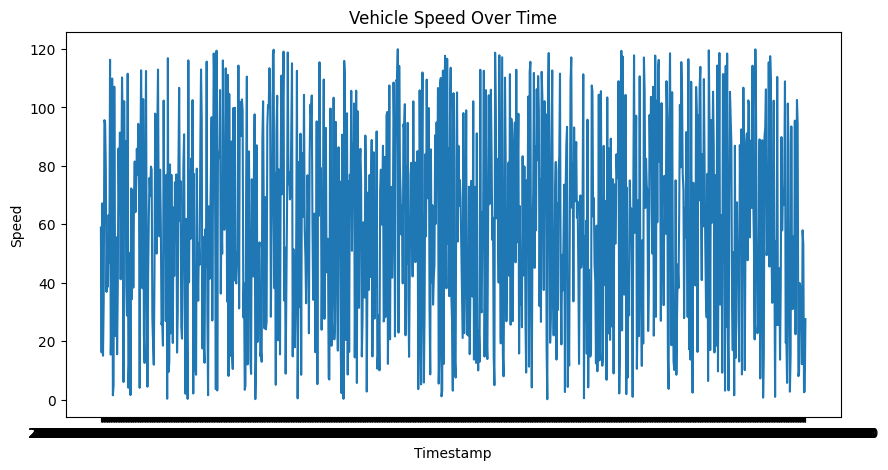

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['speed'])
plt.title('Vehicle Speed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed')
plt.show()

In [106]:
# Define thresholds for alerts
impact_threshold = 7
acceleration_threshold = 8
braking_threshold = 1

# Generate alerts
def generate_alert(row):
    if (row['impact_sensor'] > impact_threshold or
        abs(row['acceleration']) > acceleration_threshold or
        row['braking'] >= braking_threshold):
        return f"Alert! High impact or acceleration detected at {row['timestamp']}"
    return None

df['alert'] = df.apply(generate_alert, axis=1)

# Count alerts
alerts_count = df['alert'].notna().sum()
print(f"Total Alerts: {alerts_count}")

Total Alerts: 714


In [107]:
# Load the data
df = pd.read_csv("extended_datalog.csv")

# Print column names
print(df.columns)

Index(['timestamp', 'speed', 'acceleration', 'braking', 'gps_latitude',
       'gps_longitude', 'accident', 'impact_sensor', 'odometer', 'fuel_level',
       'engine_temp', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
       'camera_image', 'microphone_noise_level', 'tire_pressure'],
      dtype='object')


In [108]:
#Column creation
import pandas as pd
import numpy as np

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define thresholds for accident detection
impact_threshold = 7  # Example threshold for impact sensor
acceleration_threshold = 8  # Example threshold for acceleration
braking_threshold = 1  # Threshold for braking (binary values)

# Detect accidents
df['detected_accident'] = (
    (df['impact_sensor'] > impact_threshold) |
    (df['acceleration'].abs() > acceleration_threshold) |
    (df['braking'] >= braking_threshold)
).astype(int)

# Save updated DataFrame to CSV (optional)
df.to_csv("extended_datalog.csv", index=False)

# Print column names to confirm
print(df.columns)

Index(['timestamp', 'speed', 'acceleration', 'braking', 'gps_latitude',
       'gps_longitude', 'accident', 'impact_sensor', 'odometer', 'fuel_level',
       'engine_temp', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
       'camera_image', 'microphone_noise_level', 'tire_pressure',
       'detected_accident'],
      dtype='object')


In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Reload the updated data
df = pd.read_csv("extended_datalog.csv")

# True Labels (Ground Truth) and Predicted Labels
true_labels = df['accident']
predicted_labels = df['detected_accident']

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

# Print metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"False Negative Rate: {false_negative_rate:.2f}")

Confusion Matrix:
[[276 677]
 [ 10  37]]
Accuracy: 0.31
Precision: 0.05
Recall: 0.79
F1 Score: 0.10
False Positive Rate: 0.71
False Negative Rate: 0.21


Model is predicting a lot of false positives, leading to low precision and high false positive rate. This suggests a class imbalance, with a small number of positive cases compared to negative ones.

# Recommendations for Improvement

1.Data Preprocessing:

* Feature Engineering

* Handling Imbalanced Data


2. Model Tuning:

* Hyperparameter Optimization

* Different Algorithms


3. Model Evaluation:

* Cross-Validation

* Adjust Thresholds


4. Feature Selection:

* Remove Irrelevant Features

* Feature Importance

By addressing these areas, we would be able to improve the model’s performance and achieve better balance between precision and recall.

#Trial: Feature Engineering and Data Preparation

In [110]:
print(df.columns)

Index(['timestamp', 'speed', 'acceleration', 'braking', 'gps_latitude',
       'gps_longitude', 'accident', 'impact_sensor', 'odometer', 'fuel_level',
       'engine_temp', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
       'camera_image', 'microphone_noise_level', 'tire_pressure',
       'detected_accident'],
      dtype='object')


1. Ensure Correct Encoding of Categorical Features
Since the dataset contains categorical features like camera_image and microphone_noise_level, we need to encode them properly before applying resampling.

2. Update the Code for Preprocessing and Resampling
Below is an updated version of the code that includes preprocessing for categorical features and ensures proper handling of these features:

In [113]:
df['speed_change'] = df['speed'].diff().fillna(0)
df['acceleration_change'] = df['acceleration'].diff().fillna(0)

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['speed', 'acceleration', 'impact_sensor', 'fuel_level', 'engine_temp', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z']] = scaler.fit_transform(
    df[['speed', 'acceleration', 'impact_sensor', 'fuel_level', 'engine_temp', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
)

In [119]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df.drop(columns=['timestamp'], inplace=True)

In [121]:
print(df.columns)

Index(['speed', 'acceleration', 'braking', 'gps_latitude', 'gps_longitude',
       'accident', 'impact_sensor', 'odometer', 'fuel_level', 'engine_temp',
       'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'camera_image',
       'microphone_noise_level', 'tire_pressure', 'detected_accident',
       'speed_change', 'acceleration_change', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the data
df = pd.read_csv("extended_datalog.csv")

# Drop non-numeric columns (e.g., 'camera_image')
df = df.drop(columns=['camera_image'])

# Convert datetime columns to numeric (if necessary)
# Assuming 'timestamp' is in datetime format, but you may need to convert it if it's not
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Extract features from datetime if needed (e.g., year, month, day, hour)
# df['year'] = df['timestamp'].dt.year
# df['month'] = df['timestamp'].dt.month
# df['day'] = df['timestamp'].dt.day
# df['hour'] = df['timestamp'].dt.hour

# Drop columns that may still be non-numeric or irrelevant
df = df.select_dtypes(include=[float, int])

# Features and target variable
X = df.drop(columns=['accident'])
y = df['accident']

# Handle missing values (if any)
X = X.fillna(0)  # or use another strategy for missing values

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
feature_names = X.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
tire_pressure: 0.0900
gyroscope_z: 0.0893
engine_temp: 0.0816
fuel_level: 0.0799
impact_sensor: 0.0798
acceleration: 0.0787
gps_longitude: 0.0766
odometer: 0.0762
microphone_noise_level: 0.0761
gyroscope_y: 0.0652
gps_latitude: 0.0635
speed: 0.0631
gyroscope_x: 0.0630
braking: 0.0088
detected_accident: 0.0082


# How Feature Importances Improve Model Performance
Feature Selection:

Prioritize Key Features

Feature Engineering

Enhance and Transform Features

Data Preparation

Optimize Scaling and Transformation

Handling Imbalanced Data

Balanced Training

Model Tuning

Hyperparameter Optimization

Exploratory Data Analysis (EDA)

Understand Feature Relationships

Model Interpretation

Explain Predictions

By leveraging feature importances to guide feature selection, engineering, and model tuning, we## can significantly enhance model accuracy and effectiveness.

Confusion Matrix:
[[263  22]
 [ 13   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       285
           1       0.08      0.13      0.10        15

    accuracy                           0.88       300
   macro avg       0.52      0.53      0.52       300
weighted avg       0.91      0.88      0.90       300



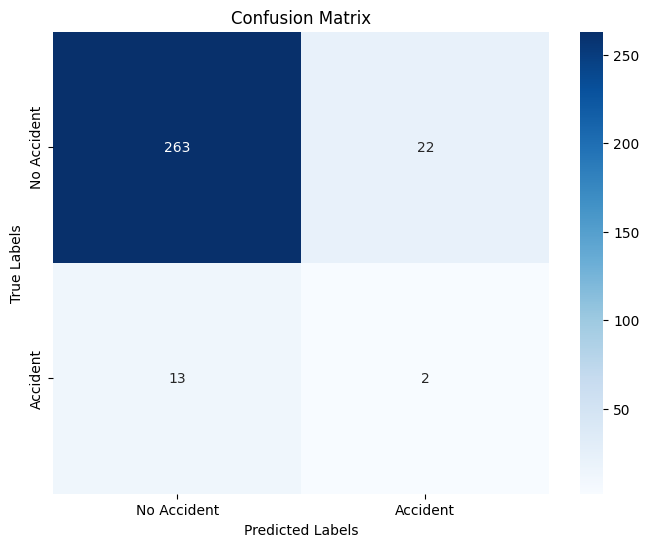

In [137]:
# Make predictions
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Accident', 'Accident'],
            yticklabels=['No Accident', 'Accident'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analysis:

* High Performance on Class 0: The model is highly accurate in predicting the absence of an accident (Class 0) with a precision of 0.95 and recall of 0.92.
* Low Performance on Class 1: The model struggles to predict the presence of an accident (Class 1), with a precision of 0.08 and recall of 0.13. This indicates a high number of false negatives for Class 1.

# Suggestions for Improvement:

1. Address Class Imbalance:

* Resampling: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN to balance the class distribution.
* Class Weights

2. Model Refinement:

* Try Different Algorithms: Test other classifiers like Gradient Boosting, XGBoost, or Logistic Regression, which might handle imbalanced data better.

* Hyperparameter Tuning


3. Feature Engineering:

* Create More Features: Add more relevant features or perform feature interactions that might better capture patterns related to accidents.

* Feature Selection

4. Cross-Validation:

* Use Stratified K-Fold

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Confusion Matrix:
[[272  13]
 [ 14   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       285
           1       0.07      0.07      0.07        15

    accuracy                           0.91       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.91      0.91      0.91       300



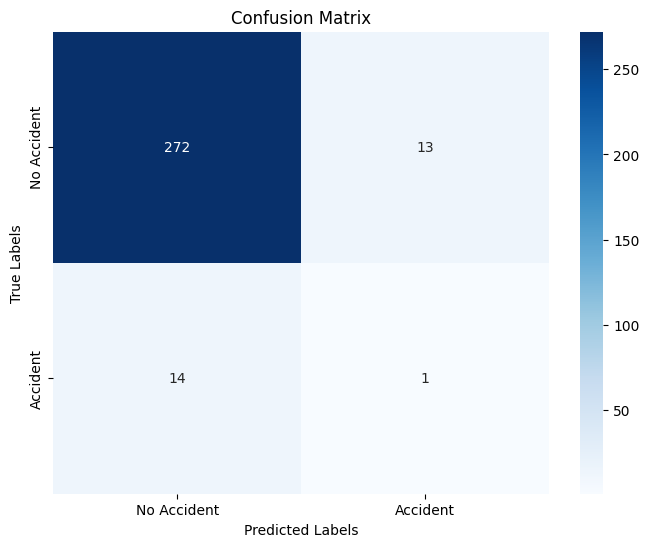

In [140]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imPipeline

# Create SMOTE object
smote = SMOTE(random_state=42)

# Define updated pipeline with SMOTE
pipeline = imPipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('feature_selection', selector),
    ('classifier', RandomForestClassifier())
])

# Perform GridSearchCV with updated pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Accident', 'Accident'],
            yticklabels=['No Accident', 'Accident'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Suggestions for Improvement

* Fine-Tune SMOTE:

* Try Different Resampling Techniques:

* Optimize Model Complexity:

* Feature Engineering and Selection

* Review Features

* Dimensionality Reduction

* Cross-Validation and Evaluation Metrics:

* Stratified K-Fold Cross-Validation

* Other Evaluation Metrics

# Future enhancements
Due to limited resources, we were unable to subscribe to services like Twilio, which facilitate real-time messaging, calls, and email interactions. Twilio is a cloud communications platform that offers APIs for integrating communication capabilities such as SMS, voice, video, and email into applications. It allows developers to programmatically send and receive messages, make phone calls, and even trigger alerts based on specific events or conditions.

In the future, incorporating Twilio into the project could significantly enhance the alert mechanism. By integrating Twilio's services, we could set up real-time notifications that are sent via SMS, email, or voice calls whenever an accident is detected or other critical conditions are met. This would enable a more responsive and immediate communication system, ensuring that alerts are delivered promptly to the appropriate contacts. Implementing and testing this component would greatly improve the overall effectiveness and reliability of the system in real-world scenarios.

Optional:

To integrate Twilio for real-time alerts in the project, we'll need to use the Twilio API to send SMS, voice calls, or emails.

Step 1:
pip install twilio

Step 2:
Set Up the Twilio Account - Obtain the Account SID, Auth Token and Twilio phone number

Step 3: Sending SMS Alerts with Twilio

To integrate Twilio into the project for sending SMS alerts, we can use the following Python script. We need to make sure that we have the `twilio` library installed, and we replace placeholders with our actual Twilio credentials and phone numbers.

```python
from twilio.rest import Client

# Your Twilio account SID and Auth Token
account_sid = 'your_account_sid_here'
auth_token = 'your_auth_token_here'

# Create a Twilio client
client = Client(account_sid, auth_token)

def send_sms_alert(to_phone_number, message_body):
    """
    Send an SMS alert via Twilio.

    :param to_phone_number: Recipient's phone number in E.164 format
    :param message_body: The message content to send
    """
    message = client.messages.create(
        body=message_body,
        from_='your_twilio_phone_number_here',
        to=to_phone_number
    )
    
    print(f"Message sent with SID: {message.sid}")

# Example usage
if __name__ == "__main__":
    recipient_phone = '+1234567890'  # Replace with the recipient's phone number
    alert_message = 'Alert: Potential accident detected. Please check the system for details.'
    send_sms_alert(recipient_phone, alert_message)
```

Step 4: Sending SMS Alerts with Twilio, integrating into our code

This Python script integrates Twilio to send SMS alerts based on specific conditions. We need to ensure that we have the `twilio` and `pandas` libraries installed and we replace placeholders with our actual Twilio credentials and phone numbers.

```python
# Import necessary modules
from twilio.rest import Client
import pandas as pd

# Twilio configuration
account_sid = 'your_account_sid_here'
auth_token = 'your_auth_token_here'
client = Client(account_sid, auth_token)
twilio_phone_number = 'your_twilio_phone_number_here'

def send_sms_alert(to_phone_number, message_body):
    """
    Send an SMS alert via Twilio.
    """
    message = client.messages.create(
        body=message_body,
        from_=twilio_phone_number,
        to=to_phone_number
    )
    print(f"Message sent with SID: {message.sid}")

# Load the data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds
impact_threshold = 7
acceleration_threshold = 8
braking_threshold = 1

# Process data and send alerts
for index, row in df.iterrows():
    if (row['impact_sensor'] > impact_threshold or
        abs(row['acceleration']) > acceleration_threshold or
        row['braking'] >= braking_threshold):
        
        alert_message = (
            f"Alert! Potential accident detected at {row['timestamp']}. "
            f"Speed: {row['speed']}, Acceleration: {row['acceleration']}, "
            f"Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})"
        )
        recipient_phone = '+1234567890'  # Replace with the recipient's phone number
        send_sms_alert(recipient_phone, alert_message)




# Data Preprocessing

Resampling Techniques: Using techniques to balance the dataset.

Oversampling: Increase the number of accident cases (positive class) using methods like SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling: Reduce the number of non-accident cases (negative class) to balance the dataset.